# Obteniendo la recta de regresión lineal a partir de un conjunto de datos

Se tiene una tabla con valores del número de habitantes y los ingresos obtenidas por diferentes ciudades, se desea saber si hay una relación lineal entre el número de habitantes de una ciudad y los ingresos que esta genera.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

colors = cm.tab10.colors
plt.style.use('seaborn-notebook')

## Importamos los datos

In [2]:
df = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])

## Graficamos una nube de puntos para ver la posible relación entre los datos

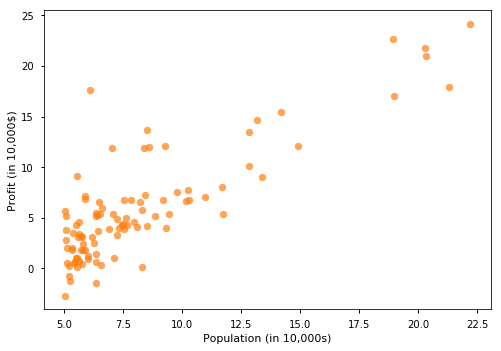

In [6]:
plt.scatter(x=df.Population, y=df.Profit, color=colors[1], alpha=0.7)

plt.xlabel('Population (in 10,000s)')
plt.ylabel('Profit (in 10,000$)')

plt.show()

## Añadimos una columna de ceros a la matriz de predictores

In [7]:
m = len(df)
df['x0'] = np.ones(m)

X = np.matrix(df[['x0', 'Population']])
y = np.array(df['Profit'])
theta = np.zeros([2, 1])

## Funciones para calcular el costo y el descenso por gradiente de una matriz theta considerando los predictores y resultados

In [8]:
def calculateCost(X, y, theta):
    h = X * theta
    error = h.transpose() - y
    error_sqr = np.square(error)
    return 1/(2*m) * np.sum(error_sqr)

def gradientDescent(X, y, theta, alpha, num_iters):
    for n in range(num_iters):
        h = X * theta
        error = h.transpose() - y
        theta_change = X.transpose() * error.transpose() * alpha * (1/m)
        theta = theta - theta_change
    return theta

## Graficamos la recta resultante de la matriz theta final luego de aplicar el descenso por gradiente para obtener de forma iterativa los valores de los parámetros de la recta de regresión

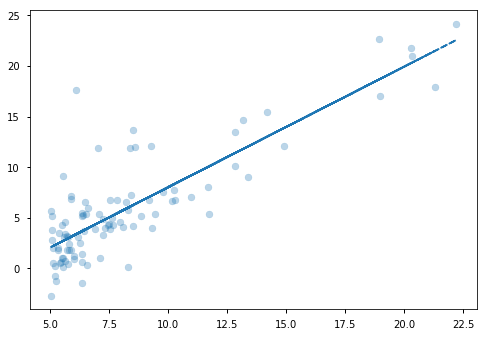

In [10]:
theta = gradientDescent(X, y, theta, 0.01, 1500)

plt.scatter(x=df.Population, y=df.Profit, color=colors[0], alpha=0.3)
plt.plot(df.Population, (X*theta), '--', color=colors[0])
plt.show()